In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

import part_b
import part_c

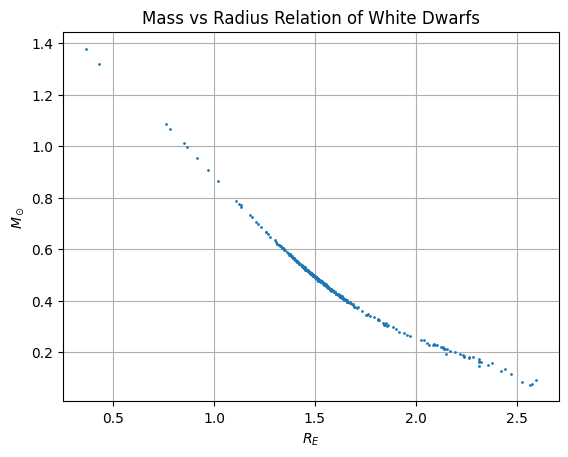

In [45]:
_, logg, M = part_b.read_WD_csv('white_dwarf_data.csv') #Read logg and M from csv
R = part_b.convert_to_radii(M,logg) #Calculate R from logg and M
plt.plot(R,M,'.',markersize=2) #Plot
plt.xlabel(r'$R_E$')
plt.ylabel(r'$M_\odot$')
plt.title('Mass vs Radius Relation of White Dwarfs')
plt.grid()
plt.show()

q = 3


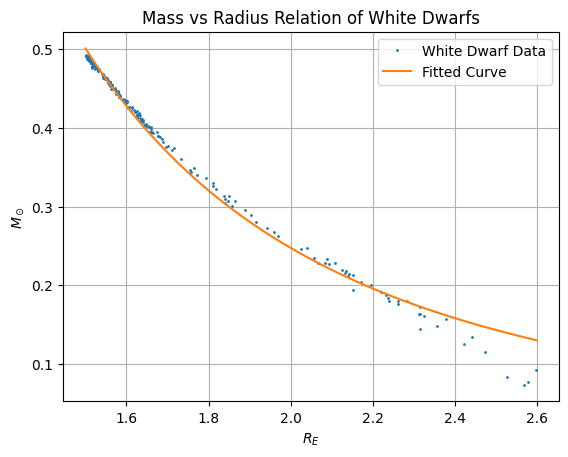

In [44]:
limit = 1.5
A, n = part_c.fit_WD_data(M,R,limit)

_Rs = np.linspace(np.min(R[R > limit]),np.max(R),200) #Linearly Spaced R
plt.plot(R[R > limit],M[R > limit],'.',markersize=2)  #Plot WD data
plt.plot(_Rs,A*_Rs**((3-n)/(1-n)))                    #Plot interpolated data
plt.xlabel(r'$R_E$')
plt.ylabel(r'$M_\odot$')
plt.title('Mass vs Radius Relation of White Dwarfs')
plt.legend(["White Dwarf Data", "Fitted Curve"])
plt.grid()

q = part_c.get_int_q(n)
print("q = %d" % q)

ξn = 3.6537537362191186
θ'(ξn) = -0.20330128263854588


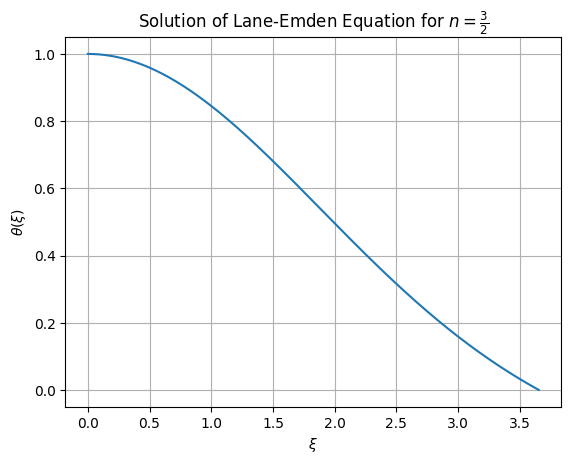

In [47]:
solution = part_c.solve_lane_emden(max_step=1e-4,n=1.5)

plt.plot(solution.t, solution.y[0])
plt.xlabel(r'$\xi$'); plt.ylabel(r'$\theta(\xi)$'); plt.grid()
plt.title(r'Solution of Lane-Emden Equation for $n=\frac{3}{2}$')

print('ξn = ' + str(solution.t[-1]))
print("θ'(ξn) = " + str(solution.y[1][-1]))

ξn = 3.653753736219
dθdξn = -0.2033012826385

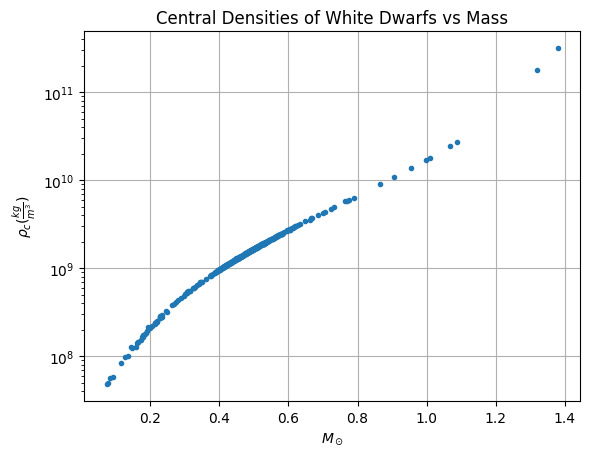

In [50]:
ρc = part_c.calc_central_density(M,R,dθdξn,ξn)
plt.semilogy(M, ρc, '.')
plt.xlabel(r"$M_\odot$"); plt.ylabel(r'$\rho_c (\frac{kg}{m^3})$')
plt.title('Central Densities of White Dwarfs vs Mass')
plt.grid()

K = 2774995.740493


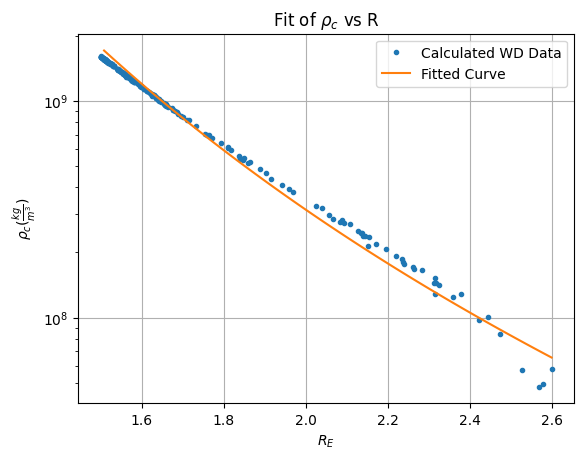

In [55]:
limit = 1.5
K = part_c.fit_K(ρc,R,ξn,limit)

Rs = np.linspace(np.min(R),np.max(R),200)
ρc2 = (4*np.pi*6.6743e-11*Rs**2*6371000**2/(5/2*K*ξn**2))**(-3)

plt.semilogy(R[R>limit],ρc[R>limit], '.')
plt.semilogy(Rs[Rs>limit],ρc2[Rs>limit])
plt.xlabel(r'$R_E$'); plt.ylabel(r'$\rho_c (\frac{kg}{m^3})$'); plt.grid()
plt.legend(['Calculated WD Data','Fitted Curve'])
plt.title(r'Fit of $\rho_c$ vs R')

print('K = %f' % K[0])